In [207]:
#Import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [208]:
#Load data
df = pd.read_excel('New_Kirk_5-2012.xlsx', header=3)
df.head()

,Year,Month,Day,Hour,Minute,power (MW),wind direction at 100m (deg),wind speed at 100m (m/s),air temperature at 2m (K),surface air pressure (Pa),density at hub height (kg/m^3)
0,2012,1,1,0,0,8.875,300.571,9.688,283.405,86307.168,1.034
1,2012,1,1,0,5,5.174,312.308,8.074,283.140,86342.864,1.036
2,2012,1,1,0,10,4.038,320.460,7.464,282.950,86368.488,1.037
3,2012,1,1,0,15,4.789,315.076,7.886,282.895,86356.568,1.036
4,2012,1,1,0,20,5.846,309.131,8.405,282.837,86353.832,1.035


In [209]:
#EDA and data processing

In [210]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Year                            105120 non-null  int64  
 1   Month                           105120 non-null  int64  
 2   Day                             105120 non-null  int64  
 3   Hour                            105120 non-null  int64  
 4   Minute                          105120 non-null  int64  
 5   power (MW)                      105120 non-null  float64
 6   wind direction at 100m (deg)    105120 non-null  float64
 7   wind speed at 100m (m/s)        105120 non-null  float64
 8   air temperature at 2m (K)       105120 non-null  float64
 9   surface air pressure (Pa)       105120 non-null  float64
 10  density at hub height (kg/m^3)  105120 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 8.8 MB


In [211]:
df.describe()

,Year,Month,Day,Hour,Minute,power (MW),wind direction at 100m (deg),wind speed at 100m (m/s),air temperature at 2m (K),surface air pressure (Pa),density at hub height (kg/m^3)
count,105120.0,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000
mean,2012.0,6.526027,15.720548,11.500000,27.500000,6.027271,193.761280,8.132554,288.767442,86114.146481,1.026027
std,0.0,3.447868,8.796289,6.922219,17.260345,5.285262,85.494084,4.313376,9.866461,481.335669,0.034446
min,2012.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.004000,0.040000,264.801000,84615.208000,0.950000
25%,2012.0,4.000000,8.000000,5.750000,13.750000,0.921000,145.935000,4.833750,280.699750,85785.286000,0.999000
50%,2012.0,7.000000,16.000000,11.500000,27.500000,4.573000,210.526000,7.818000,289.275000,86131.360000,1.022000
75%,2012.0,10.000000,23.000000,17.250000,41.250000,11.695000,253.122250,10.919000,296.516500,86437.160000,1.050000
max,2012.0,12.000000,31.000000,23.000000,55.000000,14.000000,359.994000,29.046000,310.795000,87908.440000,1.123000


In [212]:
#Sort data based on time
df.index = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day, hour=df.Hour, minute=df.Minute))
df = df.sort_index()
df.head()

,Year,Month,Day,Hour,Minute,power (MW),wind direction at 100m (deg),wind speed at 100m (m/s),air temperature at 2m (K),surface air pressure (Pa),density at hub height (kg/m^3)
2012-01-01 00:00:00,2012,1,1,0,0,8.875,300.571,9.688,283.405,86307.168,1.034
2012-01-01 00:05:00,2012,1,1,0,5,5.174,312.308,8.074,283.140,86342.864,1.036
2012-01-01 00:10:00,2012,1,1,0,10,4.038,320.460,7.464,282.950,86368.488,1.037
2012-01-01 00:15:00,2012,1,1,0,15,4.789,315.076,7.886,282.895,86356.568,1.036
2012-01-01 00:20:00,2012,1,1,0,20,5.846,309.131,8.405,282.837,86353.832,1.035


In [213]:
df.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'], inplace=True)

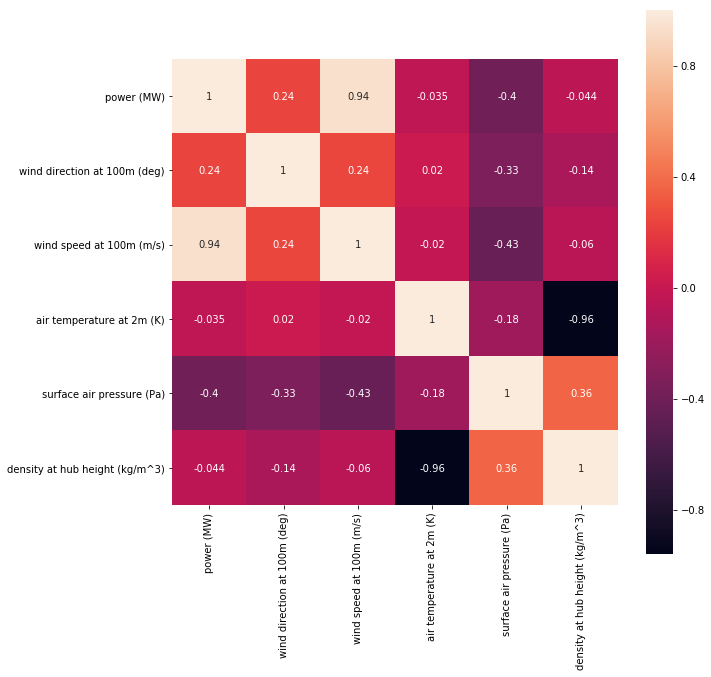

In [214]:
#Correlation between features and the target (wind power), we see that wind speed is the most correlated feature w.r.t wind power
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, square=True)

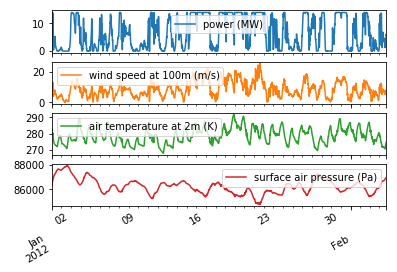

In [215]:
#The evolution of a few features over the first 10000 time steps
plot_cols = ['power (MW)', 'wind speed at 100m (m/s)', 'air temperature at 2m (K)', 'surface air pressure (Pa)']
plot_features = df[plot_cols][:10000]
plot_features.index = df.index[:10000]
_ = plot_features.plot(subplots=True)

In [216]:
#Split to train, test
SPLIT = 0.8
index = df.index.values
train_n = int(len(df) * SPLIT)
train_df = df.loc[index[:train_n]]
test_df = df.loc[index[train_n:]]
X_train = train_df[list(train_df.columns.difference(['power (MW)']))]
Y_train = train_df[['power (MW)']]
X_test = test_df[list(test_df.columns.difference(['power (MW)']))]
Y_test = test_df[['power (MW)']]

In [217]:
#Normalize data
feature_scale = MinMaxScaler().fit(X_train)
X_train = feature_scale.transform(X_train)
X_test = feature_scale.transform(X_test)
target_scale = MinMaxScaler().fit(Y_train)
Y_train = target_scale.transform(Y_train)


In [218]:
#Linear regression model
linear_model = LinearRegression().fit(X_train, Y_train)
linear_prediction = linear_model.predict(X_test)


In [219]:
#RNN model
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [220]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(loss='mse', optimizer='adam', metrics=['mae'])
rnn_model.fit(X_train, Y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/5
526/526 [==============================] - 1s 2ms/step - loss: 0.0702 - mae: 0.2293 - val_loss: 0.0253 - val_mae: 0.1366
Epoch 2/5
526/526 [==============================] - 1s 1ms/step - loss: 0.0107 - mae: 0.0844 - val_loss: 0.0033 - val_mae: 0.0474
Epoch 3/5
526/526 [==============================] - 1s 1ms/step - loss: 0.0018 - mae: 0.0323 - val_loss: 7.4038e-04 - val_mae: 0.0204
Epoch 4/5
526/526 [==============================] - 1s 1ms/step - loss: 6.8299e-04 - mae: 0.0189 - val_loss: 4.3577e-04 - val_mae: 0.0161
Epoch 5/5
526/526 [==============================] - 1s 1ms/step - loss: 5.1476e-04 - mae: 0.0170 - val_loss: 3.8031e-04 - val_mae: 0.0157


In [221]:
#Evaluation
def evaluation(prediction, actual):
        mse = mean_squared_error(prediction, actual)
        mae = mean_absolute_error(prediction, actual)
        r2 = r2_score(prediction, actual)
        print('Mean square error: ', mse)
        print('Mean absolute error: ', mae)
        print('R^2 score: ', r2)
        

In [222]:
#RNN performance
rnn_prediction = rnn_model.predict(X_test)
rnn_prediction = target_scale.inverse_transform(rnn_prediction)
evaluation(rnn_prediction, Y_test)

Mean square error:  0.10508395788812734
Mean absolute error:  0.25419689606781626
R^2 score:  0.996252891926453


In [223]:

#Linear Regression performance
linear_prediction = target_scale.inverse_transform(linear_prediction)
evaluation(linear_prediction, Y_test)

Mean square error:  3.525879197041865
Mean absolute error:  1.5409177401401946
R^2 score:  0.8649394297342541


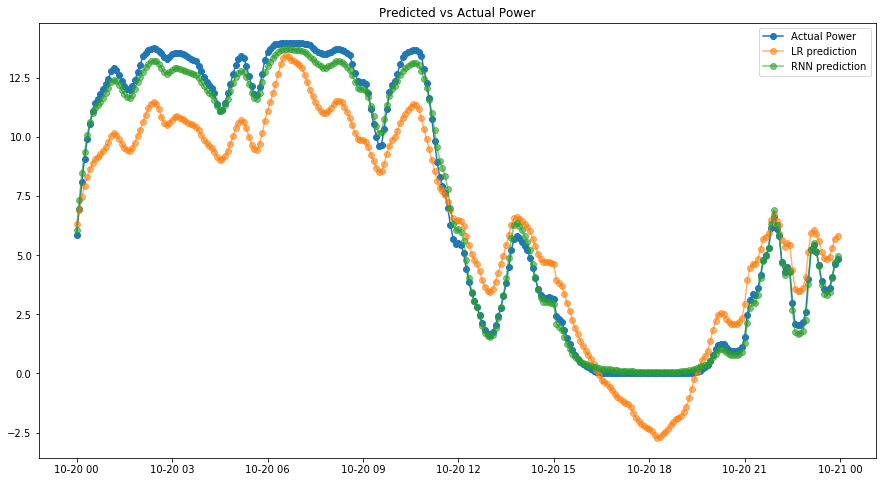

In [224]:
# Plot the actual target vs prediction values: The first 288-time steps ahead with a resolution of 5 minutes (a day-ahead wind power).
plt.figure(figsize=(15, 8))
plt.plot(index[train_n:train_n+288], Y_test[:288], color='C0', marker='o', label='Actual Power')
plt.plot(index[train_n:train_n+288], linear_prediction[:288], color='C1', marker='o', label='LR prediction', alpha=0.6)
plt.plot(index[train_n:train_n+288], rnn_prediction[:288], color='C2', marker='o', label='RNN prediction', alpha=0.6)
plt.title('Predicted vs Actual Power')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.legend()

Comments on the obtained results:
1. In terms of models, RNN performs very well and much better then Linear Regression model with respect to all performace measures.
2. As we see that wind speed is strongly correlated to the target, or 'air temperature' and 'density'.
Therfore, Linear Regression or other Machine Learning models can improve its performance, but they need more feature engineering and feature selection.
3. Deep learning model, in this case is a simple RNN model can still capture the relationship between features and the target very well without much feature engineering.
Also, the data is a time series data, even I have not applied the time series factor (using historical wind power and features to predict the wind power ahead).
Therfore, we expect that RNN model can even perform better than the current result.